In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.패키지 로드 및 데이터 로드

In [2]:
import numpy as np
import pandas as pd

from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

import matplotlib.pyplot as plt

In [3]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 44.6 MB/s 
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 109 (delta 7), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (109/109), 1.27 MiB | 6.88 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-04-20 02:52:44--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c0:3470, 2406:da00:ff00::3403:4be7, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Loca

In [4]:
total_data = pd.read_csv('/content/drive/MyDrive/YGL/Final_Project/Final_Project_Sharing/민경태/DATA/sentence_0.1_353928_1650422759.396888.csv', index_col= 0)
print('전체 데이터 갯수 :', len(total_data))

전체 데이터 갯수 : 353928


In [5]:
total_data

,data,key,label
0,남사친과 가는 길에 삼나무길관련된 곳 가서 추천해줄래?,삼나무길,0
1,남사친이랑가는 길에 해변 근처 추천해줘,해변,0
2,여친이랑 근방에 메밀관련된 곳 가서 보고 싶어,메밀,0
3,근처에 등대관련된 곳 가서 보고 싶어,등대,0
4,여사친과 근처에 수목원관련된 곳 가서 갈만한 곳 추천해줘,수목원,0
...,...,...,...
353923,남친이랑 니모메술근처 언제 가게 열어?,니모메술,2
353924,남자친구와 가는 길에 한옥근처 언제 가게 열어?,한옥,2
353925,근처에 라이플사격언제 가게 열어?,라이플사격,2
353926,남자친구와 유명한 한옥근처 언제 가게 닫혀?,한옥,2


# 2.데이터전처리

## 훈련데이터와 테스트데이터를 분리

In [6]:
# total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)

In [7]:
total_data['label'].unique(), total_data['label'].nunique()

(array([0, 1, 2]), 3)

In [8]:
total_data['label'].nunique()

3

In [9]:
total_data.drop_duplicates(subset='data', inplace=True)

In [10]:
total_data.reset_index(drop=True, inplace=True)

In [11]:
total_data.isnull().sum()

data     0
key      0
label    0
dtype: int64

In [12]:
total_data

,data,key,label
0,남사친과 가는 길에 삼나무길관련된 곳 가서 추천해줄래?,삼나무길,0
1,남사친이랑가는 길에 해변 근처 추천해줘,해변,0
2,여친이랑 근방에 메밀관련된 곳 가서 보고 싶어,메밀,0
3,근처에 등대관련된 곳 가서 보고 싶어,등대,0
4,여사친과 근처에 수목원관련된 곳 가서 갈만한 곳 추천해줘,수목원,0
...,...,...,...
351326,남친이랑 니모메술근처 언제 가게 열어?,니모메술,2
351327,남자친구와 가는 길에 한옥근처 언제 가게 열어?,한옥,2
351328,근처에 라이플사격언제 가게 열어?,라이플사격,2
351329,남자친구와 유명한 한옥근처 언제 가게 닫혀?,한옥,2


In [13]:
train_data, test_data = train_test_split(total_data, test_size=0.25, random_state=42)
print('훈련용 데이터의 갯수 :', len(train_data))
print('테스트용 데이터의 갯수 :', len(test_data))

훈련용 데이터의 갯수 : 263498
테스트용 데이터의 갯수 : 87833


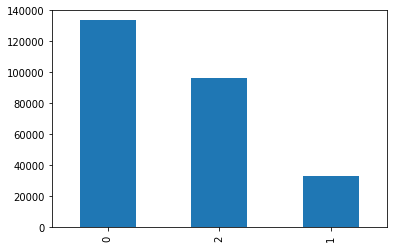

In [14]:
train_data['label'].value_counts().plot(kind='bar') 

In [15]:
print(train_data.groupby('label').size().reset_index(name='count'))

   label   count
0      0  133538
1      1   33356
2      2   96604


## 데이터 정제 2

In [16]:
train_data['data'].replace('', np.nan, inplace=True)

In [17]:
print(train_data.isnull().sum())

data     0
key      0
label    0
dtype: int64


## Test data 정제

In [18]:
#1. 중복 제거
test_data.drop_duplicates(subset='data', inplace=True)

#2. 정규표현식을 이용하여 한글 외 문자 제거
# test_data['data'] = test_data['data'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")

#3. 공백을 null 변경
test_data['data'].replace('', np.nan, inplace = True)

#4. Null값 제거
test_data['data'].dropna(how='any')

#5. 테스트 갯수 반환
print('테스트용 리뷰의 갯수 :', len(test_data))

테스트용 리뷰의 갯수 : 87833


## 불용어 제거

In [19]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [20]:
# from konlpy.tag import Okt
from konlpy.tag import Mecab
# from konlpy.tag import Komoran

In [21]:
mecab = Mecab()
# okt = Okt()
# komoran = Komoran()

In [22]:
train_data['tokenized'] = train_data['data'].apply(mecab.morphs) # 형태소 분석완료
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

test_data['tokenized'] = test_data['data'].apply(mecab.morphs) # 형태소 분석완료
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [23]:
train_data.head()

,data,key,label,tokenized
146507,가족이랑 이쪽에 크림파스타관련된 곳 가서 파는 곳 추천해줘,크림파스타,0,"[가족, 이랑, 이쪽, 크림, 파스타, 관련, 된, 곳, 서, 파, 곳, 추천, 해..."
182994,?안녕#),인사,1,"[?, 안녕, #)]"
17333,커플끼리 유명한 차귀도유람선관련된 곳 가서 보고싶어,차귀도유람선,0,"[커플, 끼리, 유명, 차귀, 유람선, 관련, 된, 곳, 서, 보, 고, 싶, 어]"
268481,여사친과 쇼핑어딨습니까?,쇼핑,2,"[여, 사친, 쇼핑, 어딨, 습니까, ?]"
191449,9hi]~,인사,1,"[9, hi, ], ~]"


In [24]:
test_data.head()

,data,key,label,tokenized
111332,여자 친구와 유명한 전시/행사 갈만한 곳 추천해줘,전시/행사,0,"[여자, 친구, 유명, 전시, /, 행사, 갈만, 곳, 추천, 해, 줘]"
90469,산관련된 곳 가서 알려줄래?,산,0,"[산, 관련, 된, 곳, 서, 알려, 줄래, ?]"
150734,부모님이랑 근처에 치킨관련된 곳 가서 시원한 음료 파는 곳 알려줘,치킨,0,"[부모, 님, 이랑, 근처, 치킨, 관련, 된, 곳, 서, 시원, 음료, 파, 곳,..."
78669,남사친과 가까운 걷기/휴식 알려줘,걷기/휴식,0,"[남, 사친, 가까운, 걷, 기, /, 휴식, 알려줘]"
45673,남사친과 이쪽에 테랍툴요가근처 갈만한 곳 추천해줘,테랍툴요가,0,"[남, 사친, 이쪽, 테, 랍, 툴, 요가, 근처, 갈만, 곳, 추천, 해, 줘]"


## 단어와 길이 분포 확인

In [25]:
x_train = train_data['tokenized'].values
y_train = train_data['label'].values
x_test = test_data['tokenized'].values
y_test = test_data['label'].values

In [26]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[list(['가족', '이랑', '이쪽', '크림', '파스타', '관련', '된', '곳', '서', '파', '곳', '추천', '해', '줘'])
 list(['?', '안녕', '#)'])
 list(['커플', '끼리', '유명', '차귀', '유람선', '관련', '된', '곳', '서', '보', '고', '싶', '어'])
 ... list(['남', '사친', '이랑', '나', '온', '돌방', '추천', '해', '줄래', '?'])
 list(['남친', '이랑', '이쪽', '과일', '주스', '근처', '파', '곳', '추천', '해', '줘'])
 list(['여', '사친', '길', '체험', '여행', '갈만', '곳', '알려', '줄래', '?', '갈래'])]
[0 1 0 ... 0 0 0]
[list(['여자', '친구', '유명', '전시', '/', '행사', '갈만', '곳', '추천', '해', '줘'])
 list(['산', '관련', '된', '곳', '서', '알려', '줄래', '?'])
 list(['부모', '님', '이랑', '근처', '치킨', '관련', '된', '곳', '서', '시원', '음료', '파', '곳', '알려줘'])
 ... list(['남친', '이랑', '나', '신', '나락', '만', '나락', '알려줘'])
 list(['남', '사친', '근처', '일몰', '명소', '관련', '된', '곳', '서', '보', '고', '싶', '어'])
 list(['여', '사친', '이랑', '이쪽', '브런치', '근처', '일식', '추천', '해', '줘'])]
[0 0 0 ... 0 0 0]


## 정수 인코딩

In [27]:
vocab_size = 10000
t = Tokenizer(vocab_size, oov_token='OOV')
t.fit_on_texts(x_train)

In [28]:
threshold = 2
total_cnt = len(t.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in t.word_counts.items():
    total_freq = total_freq + value

    if (value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합 (vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀단어의 수 : %s' %(threshold-1, rare_cnt))
print('단어 집합에서 희귀단어의 비율 :', (rare_cnt/total_cnt)*100)
print('전체 등장 빈도에서 희귀단어 등장 빈도 비율 :', (rare_freq/total_freq)* 100)

단어 집합 (vocabulary)의 크기 : 1108
등장 빈도가 1번 이하인 희귀단어의 수 : 6
단어 집합에서 희귀단어의 비율 : 0.5415162454873645
전체 등장 빈도에서 희귀단어 등장 빈도 비율 : 0.00025483366369686346


In [29]:
# 전체 단어 갯수 중 빈도수 2이하인 단어 갯수는 제거.
# 0번 패딩 토큰과 1번 OOV토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 1104


In [30]:
original_vocab_size = vocab_size + rare_cnt -2
print('원래 vocab size :', original_vocab_size)

원래 vocab size : 1108


In [31]:
x_train[0]

['가족', '이랑', '이쪽', '크림', '파스타', '관련', '된', '곳', '서', '파', '곳', '추천', '해', '줘']

In [32]:
t = Tokenizer(vocab_size, oov_token='OOV')
t.fit_on_texts(x_train)

x_train = t.texts_to_sequences(x_train)
x_test = t.texts_to_sequences(x_test)

In [33]:
print(x_train[:3])
print(x_test[:3])

[[38, 5, 29, 245, 165, 9, 8, 3, 6, 98, 3, 11, 10, 15], [2, 68, 633], [60, 73, 24, 216, 231, 9, 8, 3, 6, 43, 21, 22, 14]]
[[32, 12, 24, 152, 37, 151, 35, 3, 11, 10, 15], [403, 9, 8, 3, 6, 30, 19, 2], [39, 40, 5, 4, 244, 9, 8, 3, 6, 202, 203, 98, 3, 13]]


## 패딩(Padding)

데이터의 최대 길이 : 22
데이터의 평균 길이 : 8.935464405801941


Text(0, 0.5, 'number of samples')

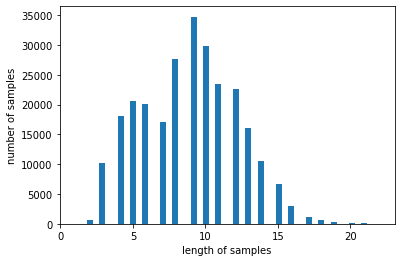

In [34]:
print('데이터의 최대 길이 :', max(len(l) for l in x_train))
print('데이터의 평균 길이 :', sum(map(len, x_train))/len(x_train))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')

In [35]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if (len(s) <= max_len):
            cnt = cnt + 1

    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율 : %s' % (max_len, (cnt/len(nested_list))*100))

In [36]:
max_len = 15
below_threshold_len(max_len, x_train)

전체 샘플 중 길이가 15 이하인 샘플의 비율 : 97.964690434083


In [37]:
x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)

print(x_train.shape)
print(x_test.shape)

(263498, 15)
(87833, 15)


In [38]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 3.학습

## 모델 정의

In [39]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [40]:
embedding_dim = 100
hidden_size = 128

model_gru = Sequential()
model_gru.add(Embedding(vocab_size, 100))
model_gru.add(GRU(hidden_size, return_sequences = True))
model_gru.add(GRU(hidden_size))
model_gru.add(Dense(3, activation='softmax'))
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         110400    
                                                                 
 gru (GRU)                   (None, None, 128)         88320     
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 298,179
Trainable params: 298,179
Non-trainable params: 0
_________________________________________________________________


In [41]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('hyerim_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [42]:
type(x_train), type(x_train),

(numpy.ndarray, numpy.ndarray)

In [43]:
epoch = 5

model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])
history_gru = model_gru.fit(x_train, y_train, epochs=epoch, callbacks=[es, mc], batch_size=60)

Epoch 1/5
4392/4392 [==============================] - 72s 14ms/step - loss: 0.0293 - acc: 0.9847
Epoch 2/5
4392/4392 [==============================] - 62s 14ms/step - loss: 0.0233 - acc: 0.9872
Epoch 3/5
4392/4392 [==============================] - 62s 14ms/step - loss: 0.0230 - acc: 0.9873
Epoch 4/5
4392/4392 [==============================] - 60s 14ms/step - loss: 0.0228 - acc: 0.9873
Epoch 5/5
4392/4392 [==============================] - 60s 14ms/step - loss: 0.0225 - acc: 0.9875


In [44]:
model_gru.evaluate(x_test, y_test)[1] # [1]은 acc를 의미하고 acc를 저장한다는 의미

2745/2745 [==============================] - 18s 6ms/step - loss: 0.0227 - acc: 0.9875


0.9874876141548157

# 4.예측하기

In [45]:
def sentiment_predict(new_sentence):
    new_sentence = mecab.morphs(new_sentence) # 형태소 분석 tokenizer

    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거

    encoded = t.texts_to_sequences([new_sentence]) # 텍스트 > 정수 시퀀스
    pad_new = pad_sequences(encoded, maxlen=max_len) # 패딩
    score = model_gru.predict(pad_new)
    print(np.argmax(score))


In [46]:
# 추천 : 0, 대화 : 1, 정보 : 2
sentiment_predict('서귀포시는 어딨어?')

2


# 5.모델 저장

In [47]:
from time import time

# 실수로 모델이 덮어씌워지는 것을 방지하기 위해 만든 장치
tt = time()

In [48]:
path = '/content/drive/MyDrive/YGL/Final_Project/Final_Project_Sharing/민경태/Result/'

# 모델 저장
model_save_name = path + 'model_catbot_sentence' + '_e_' + str(epoch) + '_dl_' + str(len(total_data)) + '_' +  str(tt) + '.h5'

model_gru.save(model_save_name)


In [49]:
# 단어장 저장
import json

word_index = t.word_index
json = json.dumps(word_index)
f = open(path + "sentence_wordIndex_v2.json", "w")
f.write(json)
f.close()

In [50]:
# 불러오기
# new_model = tf.keras.models.load_model(model_save_name)
# test_loss, test_acc = new_model.evaluate(x,  y, verbose=2)